### Support Vector Machine (SVM)

The primary objective of a Support Vector Machine (SVM) is to construct an optimal separating hyperplane that distinctively classifies data points into different categories. While multiple hyperplanes may exist that separate the data, SVM aims to identify the specific hyperplane that maximizes the **margin**—the distance between the hyperplane and the nearest data points (support vectors) of any class.

#### Mathematical Formulation

To maximize this margin, the problem is formulated as a convex optimization problem: we seek to minimize the squared norm of the weight vector $w$, subject to the constraint that all data points are correctly classified outside the margin.

**Objective Function (Primal Form):**
$$
\min_{w, b} \frac{1}{2} ||w||^2
$$
Subject to:
$$
y_i(w^T x_i + b) \geq 1, \quad \forall i
$$

Using Lagrange multipliers, this can be transformed into the **Dual Form**, which is computationally efficient for non-linear transformations. The final optimization problem is expressed as:

$$
L(\alpha) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i^T x_j)
$$

Where:
* $\alpha_i$: Lagrange multipliers.
* $y_i, y_j$: Class labels.
* $x_i, x_j$: Feature vectors.

#### Key Parameters

To optimize the model's performance, the following hyperparameters are critical:

* **C (Regularization Parameter):**
    This parameter controls the trade-off between achieving a smooth decision boundary and classifying the training points correctly.
    * **Default:** 1.0
    * **Effect:** A larger `C` aims for a smaller margin if it results in better classification accuracy (hard margin), while a smaller `C` allows for a wider margin with some misclassifications (soft margin), preventing overfitting.

* **Kernel:**
    The kernel function transforms the input data into a higher-dimensional space to enable linear separation of non-linear data.
    * **Default:** 'rbf' (Radial Basis Function).
    * **Options:** `linear`, `poly`, `rbf`, `sigmoid`.
    * **Significance:** Selecting the appropriate kernel is crucial for fitting the model to the intrinsic structure of the dataset.

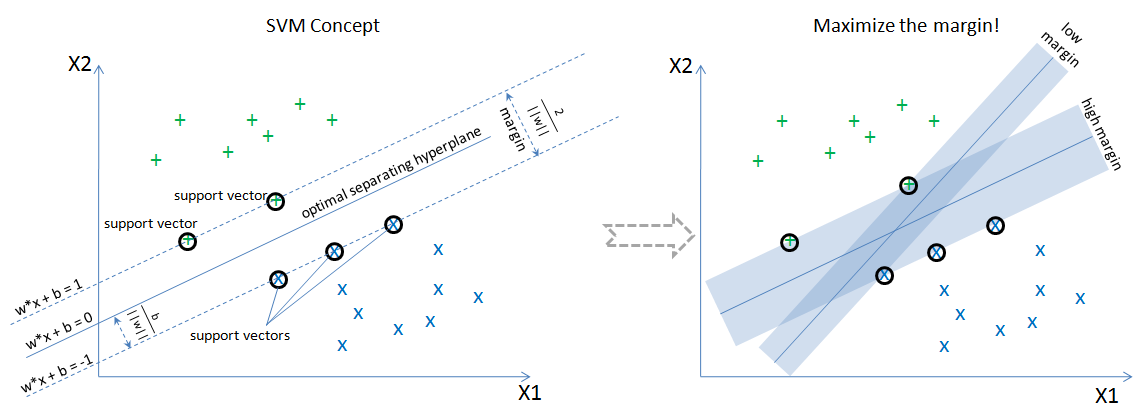

In [1]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/SVM.png', width=800)

### Multivariate and Multi-class Decision Tree

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
# X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [6]:
from sklearn.svm import SVC
from sklearn import metrics

clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Train - Confusion matrix :", metrics.confusion_matrix(y_train, clf.predict(X_train)))
print("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))

print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Test - Confusion matrix :", metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.9523809523809523
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Test - Accuracy : 0.9777777777777777
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98     

### Plot Decision Boundary 

Let's consider a two class example to keep things simple

In [7]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, weights=[.5, .5], random_state=0)

clf = SVC(kernel='linear', random_state=0)
clf.fit(X, y)

SVC(kernel='linear', random_state=0)

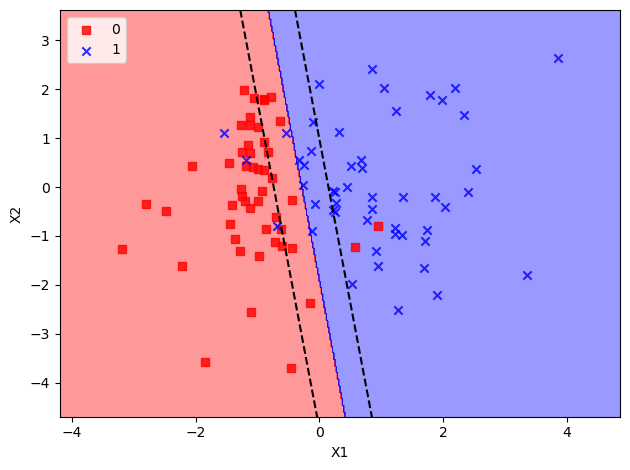

In [8]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()